# Solving Median House Value classification problem implementing a **deep neural network with ReLU** and tf.Keras

In [1]:
# Tensorflow and tf.keras
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# Google file system
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

TensorFlow 1.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
ATT_FILE = "/gdrive/My Drive/DeepLearning/OceanProximityPreparedCleanAttributes.csv"
LABEL_FILE = "/gdrive/My Drive/DeepLearning/OceanProximityOneHotEncodedClasses.csv"
TRAIN_RATE=0.8

attributes = pd.read_csv(ATT_FILE)
label = pd.read_csv(LABEL_FILE)

n_instances = attributes.shape[0]
n_train = int(n_instances*TRAIN_RATE)
n_dev = int((n_instances-n_train)/2)
n_test = int((n_instances-n_train)/2)

x_train = attributes.values[:n_train]
t_train = label.values[:n_train]

x_dev = attributes.values[n_train:n_train+n_dev]
t_dev = label.values[n_train:n_train+n_dev]

x_test = attributes.values[n_train+n_dev:n_instances]
t_test = label.values[n_train+n_dev:n_instances]

print ("x_train:",x_train.shape)
print ("t_train:",t_train.shape)


print ("x_dev:",x_dev.shape)
print ("t_dev:",t_dev.shape)

print ("x_test:",x_test.shape)
print ("t_test:",t_test.shape)

x_train: (16342, 9)
t_train: (16342, 4)
x_dev: (2043, 9)
t_dev: (2043, 4)
x_test: (2043, 9)
t_test: (2043, 4)


## Initialization

In [0]:
INPUTS = x_train.shape[1]
OUTPUTS = t_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(x_train.shape[0]/1))
NUM_DEV_EXAMPLES = int (round (x_dev.shape[0]/1))


Some data is displayed to test correctness:

In [4]:
x_train[:5]

array([[ 0.01394422, -0.63018066,  0.56862745, -0.90676026, -0.90378647,
        -0.96188234, -0.89902976, -0.39341526,  0.41525602],
       [-0.55577689,  0.08607864, -0.01960784, -0.99186123, -0.99193048,
        -0.9953474 , -0.99210656, -0.74136908, -0.49484332],
       [ 0.09960159, -0.41976621,  0.25490196, -0.93956966, -0.93296089,
        -0.95997646, -0.93586581, -0.70616957, -0.72659494],
       [ 0.30278884, -0.75982997, -0.7254902 , -0.89338217, -0.89416511,
        -0.94926988, -0.89212301,  0.00122757,  0.3521635 ],
       [-0.59960159,  0.06057386,  0.01960784, -0.83025586, -0.85102421,
        -0.92426918, -0.84969577, -0.06095088,  0.8540171 ]])

In [5]:
t_train[:10]

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [6]:
x_dev[:5]

array([[ 0.18326693, -0.69819341,  0.68627451, -0.90843888, -0.9053383 ,
        -0.95795846, -0.90758099, -0.23743121,  0.40618389],
       [ 0.187251  , -0.65143464,  0.60784314, -0.90055445, -0.8795779 ,
        -0.94495361, -0.86416708, -0.66444601, -0.07133991],
       [-0.6314741 ,  0.10520723,  0.60784314, -0.91530597, -0.8777157 ,
        -0.94181451, -0.8730472 , -0.52298589,  0.06680385],
       [ 0.14342629, -0.65356004, -0.29411765, -0.69774658, -0.58286778,
        -0.8672048 , -0.5892123 , -0.53352368,  0.29443178],
       [ 0.38047809, -0.66631243, -0.05882353, -0.78335622, -0.72315332,
        -0.87017573, -0.76944581, -0.60057103, -0.6004099 ]])

In [7]:
t_dev[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

## Hyperparameters

The number of hidden layers and neurons per layer must be adjusted. In this example, we increase the computational power of the neural network by adding up to three hidden layers (to be deep) and more neurons per layer. 

In [0]:
n_epochs = 1500 # corresponding to about 20,000 iterations
learning_rate = 0.1
batch_size = 264
#n_neurons_per_hlayer = [2500,2500,2500] 

## Build the deep neural model

First of all, a sequential model is created. This is the one of Keras models, for full-connected feedforward neural networks, in which layers are sequentially connected. This is called the *sequential* API.

In [0]:
model = keras.Sequential(name="Feedforward NN")

Define the deep neural network topology. Note that the **tanh** activation function is chosen for the hidden layers and  **softmax** for the ouput layer. **We expect that the neural network does not train properly since we are employing an activation function that saturates at the edges**. 

Adding layers to the model. The model takes as input matrix tensors with *INPUTS* columns and *batch size* rows. *InputLayer* creates a placeholder where the data is ready to feed the network. Then the hidden layers with *tanh* activation function are created. Finally, the output layer with the *softmax* activation function is added. 

In [10]:
from keras.layers import  Dropout,Flatten, Dense,Activation
model.add(keras.layers.InputLayer( input_shape=(INPUTS,), batch_size=None))

model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.015))
model.add(keras.layers.Dense(93, activation="relu"))
model.add(keras.layers.Dense(85, activation="relu"))









model.add(keras.layers.Dense(OUTPUTS, activation="softmax"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "Feedforward NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1000      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 93)                9393      
_________________________________________________________________
dense_2 (Dense)              (None, 85)                7990      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 344       
Total params: 18,727
Trainable params: 18,727
Non-trainable params: 0
_________________________________________________________________


Using TensorFlow backend.


For example, the kernel in the last layer comprises 303 parameters to adjust: 100 neurons in the previous layer by 3 neurons in the output layer plus the three biases, one for each output neuron. 

In [11]:
model.layers

In [12]:
for l in model.layers: print (l.name)

dense
dropout
dense_1
dense_2
dense_3


All the parameters of a layer can bee accessed:

In [13]:
weights, biases = model.layers[0].get_weights()
weights.shape

(9, 100)

In [14]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [15]:
biases.shape

(100,)

# Compiling the model

Compiling the model means specifying the *loss* function (the $log-loss$,  $cross-entropy$, the sum of log-loss is a loss) and the *optimizer* (Gradient Descent) to use. Optionally, you can also specify a list of extra *metrics* (Accuracy) to compute during training and evaluation. In this case, 

In [0]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(lr=learning_rate, nesterov=True),
              metrics=["categorical_accuracy"])


There are several losses functions, optimizers and metrics. Full lists are available at: https://keras.io/losses/, https://keras.io/optimizers/ and https://keras.io/metrics/.


## Training and validating the model with M-BGD

Note that an **epoch** is an iteration over the entire training dataset provided.

In [17]:
import time
start = time.clock()
history = model.fit(x_train, t_train, batch_size=batch_size, epochs=n_epochs, verbose=2, validation_data=(x_dev, t_dev))    
print (time.clock() - start)

Train on 16342 samples, validate on 2043 samples
Epoch 1/1500
16342/16342 - 2s - loss: 1.0145 - categorical_accuracy: 0.6040 - val_loss: 0.8356 - val_categorical_accuracy: 0.7039
Epoch 2/1500
16342/16342 - 0s - loss: 0.8029 - categorical_accuracy: 0.6958 - val_loss: 0.7249 - val_categorical_accuracy: 0.7386
Epoch 3/1500
16342/16342 - 0s - loss: 0.7391 - categorical_accuracy: 0.7183 - val_loss: 0.6969 - val_categorical_accuracy: 0.7381
Epoch 4/1500
16342/16342 - 0s - loss: 0.7219 - categorical_accuracy: 0.7229 - val_loss: 0.6328 - val_categorical_accuracy: 0.7641
Epoch 5/1500
16342/16342 - 0s - loss: 0.6854 - categorical_accuracy: 0.7360 - val_loss: 0.7408 - val_categorical_accuracy: 0.6921
Epoch 6/1500
16342/16342 - 0s - loss: 0.6437 - categorical_accuracy: 0.7485 - val_loss: 0.8267 - val_categorical_accuracy: 0.6397
Epoch 7/1500
16342/16342 - 0s - loss: 0.6346 - categorical_accuracy: 0.7513 - val_loss: 0.5651 - val_categorical_accuracy: 0.7802
Epoch 8/1500
16342/16342 - 0s - loss: 0.6

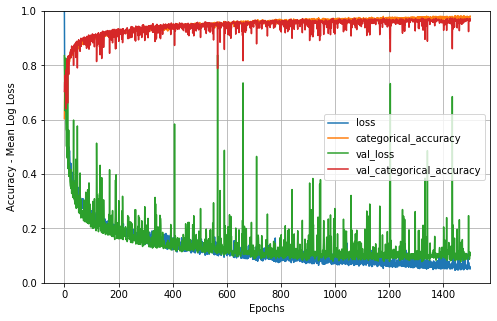

In [18]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Note how the learning curves are plain. BP learning algorithm does not modify the weights of the connections because the derivative of the tanh fucntion is zero for high values of the net: **fundamental deep learning problem**. 

In [19]:
history.params

{'batch_size': 264,
 'do_validation': True,
 'epochs': 1500,
 'metrics': ['loss',
  'categorical_accuracy',
  'val_loss',
  'val_categorical_accuracy'],
 'samples': 16342,
 'steps': None,
 'verbose': 0}

In [20]:
results[-1:]

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
1499,0.051368,0.98103,0.100885,0.970631


In [21]:
print ("Accuracy for the training set: ", results.categorical_accuracy.values[-1:][0])

Accuracy for the training set:  0.9810304641723633


In [22]:
print ("Accuracy for the development test set: ", results.val_categorical_accuracy.values[-1:][0])

Accuracy for the development test set:  0.9706314206123352


Now the accuracy is 73% on training and 73% on the develoment test set, very similar values to those achieved with just one hidden layer with 1,000 neurons.  

Let's see how the model predicts on the development test set:

In [23]:
dev_predictions=model.predict(x_dev).round(2)
dev_predictions[:20]


array([[1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.31, 0.69, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  ],
       [0.03, 0.  , 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  ]], dtype=float32)

In [24]:
dev_rounded_predictions=np.round(dev_predictions)
indices = np.argmax(dev_predictions,1)
for row, index in zip(dev_rounded_predictions, indices): row[index]=1
dev_rounded_predictions[:20]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [25]:
t_dev[:20] #target classes

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [26]:
dev_correct_predictions = np.equal(np.argmax(dev_rounded_predictions,1),np.argmax(t_dev,1))
print (dev_correct_predictions[:30])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [27]:
from collections import Counter
Counter (dev_correct_predictions)

Counter({False: 60, True: 1983})

In [28]:
# evaluate the keras model
_,accuracy_2 = model.evaluate(x_test, t_test)
print('Accuracy: %.2f' % (accuracy_2*100))

2043/2043 [==============================] - 0s 55us/sample - loss: 0.0802 - categorical_accuracy: 0.9721
Accuracy: 97.21
